# Call Geo Engine via API

In [1]:
import geoengine as ge
from datetime import datetime
from zipfile import ZipFile
import io

## Initialize

In [2]:
ge.initialize("http://localhost:3030")

## Register workflow

In [3]:
workflow = ge.register_workflow({
    "type": "Vector",
    "operator": {
        "type": "RasterVectorJoin",
        "params": {
                "names": ["NDVI"],
                "temporalAggregation": "none",
                "featureAggregation": "mean",
        },
        "sources": {
            "vector": {
                "type": "OgrSource",
                "params": {
                    "data": {
                        "type": "internal",
                        "datasetId": "a9623a5b-b6c5-404b-bc5a-313ff72e4e75"
                    },
                    "attributeProjection": None
                }
            },
            "rasters": [{
                "type": "GdalSource",
                "params": {
                    "data": {
                        "type": "internal",
                        "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                    }
                }
            }]
        },
    }
})

workflow

c56a4aa3-0a16-59a0-b78e-e20191671fec

## Get result metadata of workflow

In [4]:
workflow.get_result_descriptor()

Data type:         MultiPoint
Spatial Reference: EPSG:4326
Columns:
  NDVI:
    Column Type: int
    Measurement: vegetation
  name:
    Column Type: text
    Measurement: unitless
  scalerank:
    Column Type: int
    Measurement: unitless
  website:
    Column Type: text
    Measurement: unitless
  featurecla:
    Column Type: text
    Measurement: unitless
  natlscale:
    Column Type: float
    Measurement: unitless

## Get dataframe via WFS

In [5]:
time = datetime.strptime('2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

data = workflow.get_dataframe(
    ge.QueryRectangle(
        [-111.533203125, -4.482421875, 114.345703125, 73.388671875],
        [time, time]
        )
    )

data

,geometry,website,scalerank,NDVI,name,natlscale,featurecla,start,end
0,POINT (-69.92356 12.43750),www.rocargo.com/SanNicolas.html,8,77.0,Sint Nicolaas,5.0,Port,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
1,POINT (-61.85230 17.12278),www.ab.gov.ag,8,125.0,Saint John's,5.0,Port,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
2,POINT (2.93369 51.23000),www.portofoostende.be,8,177.0,Oostende (Ostend),5.0,Port,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
3,POINT (3.20459 51.33639),www.zeebruggeport.be,8,136.0,Zeebrugge,5.0,Port,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
4,POINT (27.45830 42.47000),www.port-burgas.com,8,138.0,Burgas,5.0,Port,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...
733,POINT (-74.02426 40.68833),www.panynj.gov,3,82.0,New York,75.0,Port,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
734,POINT (-94.81790 29.30417),www.portofgalveston.com,3,78.0,Galveston,75.0,Port,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
735,POINT (-76.29252 36.90194),www.vaports.com,3,136.0,Norfolk,75.0,Port,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
736,POINT (-79.38000 43.61000),None,3,73.0,Toronto,75.0,Port,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00


## Plot points colored by NDVI value

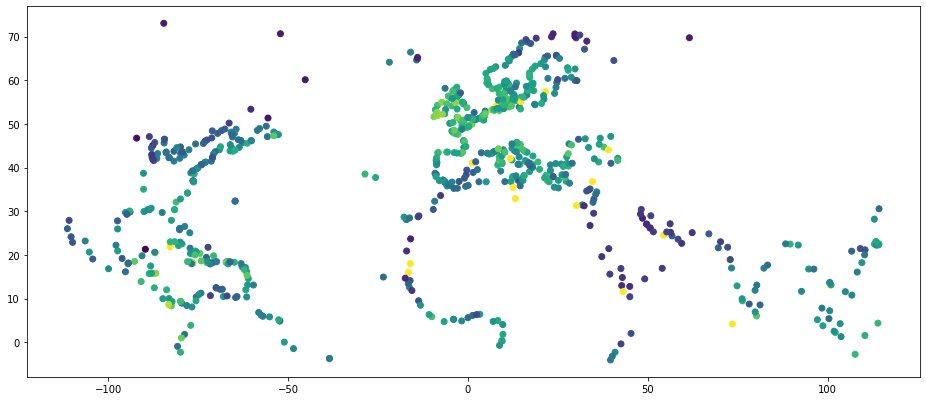

In [6]:
data.plot('NDVI', figsize=(16, 8));

## Getprovenance information from the server

In [7]:
prov_list = workflow.get_provenance()
prov_list

[ProvenanceOutput(data=a9623a5b-b6c5-404b-bc5a-313ff72e4e75, provenance=Provenance(citation='Natural Earth, Cultural Vectors 10m Ports', license='Public domain by Natural Earth http://www.naturalearthdata.com/about/terms-of-use/', uri='https://www.naturalearthdata.com/downloads/10m-cultural-vectors/ports/')),
 ProvenanceOutput(data=36574dc3-560a-4b09-9d22-d5945f2b8093, provenance=Provenance(citation='Nasa Earth Observations, MODIS Vegetation Index Products', license='https://earthdata.nasa.gov/collaborate/open-data-services-and-software/data-information-policy', uri='https://modis.gsfc.nasa.gov/data/dataprod/mod13.php'))]

## Get all metadata combined in a ZIP file

In [8]:
zip_content = io.BytesIO() # alternatively, a file path

workflow.metadata_zip(zip_content)

zip_file = ZipFile(zip_content)

zip_file.printdir()

File Name                                             Modified             Size
workflow.json                                  2022-08-04 08:12:32          772
metadata.json                                  2022-08-04 08:12:32         1074
citation.json                                  2022-08-04 08:12:32          794
